<h1>Playing with Forest</h1>

In [4]:
import pyquil.quil as pq
import pyquil.api as api
from pyquil.gates import *
import numpy as np
import math

qvm = api.SyncConnection()

<h2>Documentation exercises</h2>

In the documentation of pyQuil (http://pyquil.readthedocs.io/en/latest/), Rigetti gives a few warm-up exercises to get familiar with its library. Let's dig into them!

<h3>Exercise 1 - Quantum Dice</h3>

<i>Write a quantum program to simulate throwing an 8-sided die.</i>

In [5]:
def throw_octahedral_die():
    # return the result of throwing an 8 sided die, an int between 1 and 8, by running a quantum program
    prep = pq.Program().inst(H(0),H(1),H(2))

    print(qvm.wavefunction(prep)[0])

    p = prep.measure(0,0).measure(1,1).measure(2,2)

    classical_regs = [0,1,2]

    results = qvm.run(p, classical_regs, 100)

    int_res = []

    for res in results:
        int_res+=[res[0]*4+res[1]*2+res[2]+1]

    return(int_res)

In [7]:
print(throw_octahedral_die())

(0.3535533906+0j)|000> + (0.3535533906+0j)|001> + (0.3535533906+0j)|010> + (0.3535533906+0j)|011> + (0.3535533906+0j)|100> + (0.3535533906+0j)|101> + (0.3535533906+0j)|110> + (0.3535533906+0j)|111>
[2, 3, 2, 4, 5, 6, 2, 5, 6, 4, 6, 8, 2, 3, 1, 7, 4, 4, 1, 6, 3, 2, 3, 5, 5, 4, 4, 5, 4, 3, 3, 2, 5, 4, 2, 7, 6, 1, 1, 1, 3, 1, 8, 5, 5, 8, 1, 8, 6, 5, 3, 1, 7, 3, 3, 4, 6, 7, 1, 3, 7, 3, 2, 5, 2, 2, 1, 4, 2, 1, 6, 1, 1, 4, 2, 7, 4, 1, 5, 3, 4, 1, 3, 5, 1, 4, 3, 7, 7, 1, 4, 7, 7, 8, 3, 3, 3, 5, 7, 1]


As we can see from the wavefunction of the program we created, the eight outcomes have equal probabilty, which is (0,3535533906)²≈0.125=1/8.<br/>
We then run the program 100 times to get a sample of these outcomes.

<i>Next, extend the program to work for any kind of fair die.</i>

In [10]:
from functools import reduce

def throw_polyhedral_die(num_sides):
    # return the result of throwing a num_sides sided die by running a quantum program
    num_qubits = math.ceil(math.log(num_sides, 2))
    p = pq.Program()
    for i in range(1,num_qubits+1):
        p += pq.Program(H(i))
    for i in range(1,num_qubits+1):
        p += pq.Program().measure(i,i)
    classical_regs = [i for i in range(1,num_qubits+1)]
    results = qvm.run(p, classical_regs, 100)
    results = list(filter(lambda x: x <=num_sides, [reduce(lambda x,y: 2*x+y, r)+1 for r in results]))
    return(results)

In [11]:
print(throw_polyhedral_die(1600))

[85, 19, 579, 1223, 945, 1464, 1362, 1128, 1135, 1402, 516, 173, 1252, 154, 668, 976, 224, 1217, 1178, 92, 1056, 553, 350, 1566, 1064, 174, 1248, 1387, 572, 1180, 1187, 1546, 1183, 327, 704, 947, 108, 964, 341, 1035, 567, 305, 101, 926, 1021, 297, 1348, 13, 849, 1017, 178, 95, 1501, 535, 1102, 691, 1465, 1034, 1265, 287, 569, 1512, 123, 394, 453, 838, 843, 54, 1072, 1221, 119, 788, 1392, 129, 1018, 1427, 710, 181, 817, 810]


Because we are working with qubits, we choose the smallest integer m giving 2^m >= num_sides. This gives a die with more sides than asked. Another solution would be to limit the number of sides to a power of 2 with an assert.

<h3>Exercise 2 - Controlled Gates</h3>

<i>1. Write a function "controlled" which takes a 2×2 matrix U representing a single qubit operator, and makes a 4×4 matrix which is a controlled variant of U, with the first argument being the control qubit.</i>

In [21]:
def controlled(U):
    U = np.array(U)
    assert (np.array_equal(U.transpose().conjugate().dot(U),np.eye(U.shape[0]))),"U is not unitary!"
    c_u = np.kron(np.array([[0,0],[0,1]]),U)
    for i in range(U.shape[0]):
        c_u[i][i] = 1
    return(c_u)

In [22]:
print(controlled(np.ones((2,2))))

AssertionError: U is not unitary!

In [23]:
x_gate_matrix = np.array(([0.0, 1.0], [1.0, 0.0]))
print(controlled(x_gate_matrix))

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]]


<i>2. Write a Quil program to define a controlled-Y gate in this manner. Find the wavefunction when applying this gate to qubit 1 controlled by qubit 0.</i>

In [27]:
y_gate_matrix = np.array([[0.0+0.0j, 0.0-1.0j], [0.0+1.0j, 0.0+0.0j]])
controlled_y =  controlled(y_gate_matrix)
p = pq.Program().defgate("C-Y", controlled_y)
print(p)

DEFGATE C-Y:
    1.0+0.0i, 0.0+0.0i, 0.0+0.0i, 0.0+0.0i
    0.0+0.0i, 1.0+0.0i, 0.0+0.0i, 0.0+0.0i
    0.0+0.0i, 0.0+0.0i, 0.0+0.0i, 0.0-1.0i
    0.0+0.0i, 0.0+0.0i, 0.0+1.0i, 0.0+0.0i




In [28]:
p.inst(I(0),X(1)).inst(("C-Y", 0, 1))
wvf, _ = qvm.wavefunction(p)
print(wvf.amplitudes)

[ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]


In [29]:
p = pq.Program().defgate("C-Y", controlled_y)
p.inst(I(1),X(0)).inst(("C-Y", 0, 1))
wvf, _ = qvm.wavefunction(p)
print(wvf.amplitudes)

[ 0.+0.j  0.+0.j  0.+0.j  0.+1.j]


We defined a function to create controlled-matrices and tested it with a controlled Y-gate which indeed works as expected. 

<h3>Exercise 3 - Grover’s Algorithm</h3>

<i>Write a quantum program for the single-shot Grover’s algorithm.</i>

In [71]:
from functools import reduce

In [72]:
# data is an array of 0's and 1's such that there are exactly three times as many
# 0's as 1's
def single_shot_grovers(data):
    num = len(data)
    n_qubits = math.ceil(math.log(num, 2))
    data = data+[0 for i in range(2**n_qubits-num)]
    num = len(data)
    p = pq.Program()
    hadamard = np.array([[1,1],[1,-1]])/math.sqrt(2)
    H_n = hadamard
    for i in range(n_qubits-1):
        H_n = np.kron(H_n,hadamard)
    p.defgate("H-n", H_n)
    oracle = np.multiply(np.eye(num),-2*np.array(data)+1)
    p.defgate("O", oracle)
    Grover_diff = 2*np.ones((num,num))/num-np.eye(num)
    p.defgate("G", Grover_diff)
    qubits = [i+1 for i in range(n_qubits)]
    p.inst(tuple(["H-n"]+qubits))
    p.inst(tuple(["O"]+qubits))
    p.inst(tuple(["G"]+qubits))

    wvf, _ = qvm.wavefunction(p)
    print(wvf)

    classical_regs = [i for i in range(1,n_qubits+1)]
    for i in classical_regs:
        p.measure(i,i)
    result = qvm.run(p, classical_regs)[0]
    result = reduce(lambda x,y: 2*x+y, result)
    return(result)

In [73]:
print(single_shot_grovers([0,0,1,0]))

(1+0j)|01>
2


In [76]:
print(single_shot_grovers([0,0,0,0,1,0,0,1]))

(0.7071067812+0j)|001> + (0.7071067812+0j)|111>
7


In [82]:
#out of the problem's usecase
print(single_shot_grovers([0,0,0,0,1,0,0]))

(0.1767766953+0j)|000> + (0.8838834765+0j)|001> + (0.1767766953+0j)|010> + (0.1767766953+0j)|011> + (0.1767766953+0j)|100> + (0.1767766953+0j)|101> + (0.1767766953+0j)|110> + (0.1767766953+0j)|111>
0


Grover's algorthm is based on an Oracle, which matrix reprsentation is:
\begin{split}\begin{pmatrix}
1 & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
0 & \ddots & & & & &\\
& & 1 & & & & \vdots\\
& & & -1 & & &\\
\vdots & & & & 1 & & \\
& & & & & \ddots & 0 \\
0 & & & & \cdots & 0 & 1
\end{pmatrix}\end{split}
(its function is to highlight the searched element(s))<br/>
and a diffusion operator, which matrix representation is:
\begin{split}\begin{pmatrix}
2/N - 1 & 2/N & \cdots & 2/N \\
2/N &  & &\\
\vdots & & \ddots & \\
2/N & & & 2/N-1
\end{pmatrix}\end{split}
In the case were there is only one element to find, Grover's algorithm needs roughly $\sqrt N$ iterations to find it with a "high" probability. But here we always have three times more zeros than ones in our list, which is equivalent to the complexity of the length 4 case with one element to find, then the single-shot Grover's works.

<h3>Extra exercise - Prisoner’s Dilemma</h3>

<i>A classic strategy game is the <a href="https://en.wikipedia.org/wiki/Prisoner%27s_dilemma">prisoner’s dilemma</a> where two prisoners get the minimal penalty if they collaborate and stay silent, get zero penalty if one of them defects and the other collaborates (incurring maximum penalty) and get intermediate penalty if they both defect. This game has an equilibrium where both defect and incur intermediate penalty.<br>

However, things change dramatically when we allow for quantum strategies leading to the <a href="https://arxiv.org/abs/quant-ph/9806088">Quantum Prisoner’s Dilemma</a>.<br>

Can you design a program that simulates this game?</i>

In [83]:
def prisoners_dilemma(gamma, theta_a, phi_a, theta_b, phi_b):
    gamma = gamma*math.pi/2
    theta_a = theta_a*math.pi
    theta_b = theta_b*math.pi
    phi_a = phi_a*math.pi/2
    phi_b = phi_b*math.pi/2

    alice_register = 0
    bob_register = 1

    outcome = {(0,0):(3,3), (0,1):(0,5), (1,0):(5,0), (1,1):(1,1)}

    p = pq.Program()

    D = np.array([[0,1],[-1,0]])
    I_gate = np.exp(gamma*0.5j)*np.kron(D,D)
    p.defgate("I", I_gate)
    U_a = np.array([[np.exp(phi_a*1.0j)*math.cos(theta_a/2),math.sin(theta_a/2)],[-math.sin(theta_a/2),np.exp(-phi_a*1.0j)*math.cos(theta_a/2)]])
    p.defgate("Ua", U_a)
    U_b = np.array([[np.exp(phi_b*1.0j)*math.cos(theta_b/2),math.sin(theta_b/2)],[-math.sin(theta_b/2),np.exp(-phi_b*1.0j)*math.cos(theta_b/2)]])
    p.defgate("Ub", U_b)
    I_dagger = I_gate.conjugate().transpose()
    p.defgate("Id", I_dagger)

    p.inst(("I",0,1))
    p.inst(("Ua",0),("Ub",1))
    p.inst(("Id",0,1))

    wvf, _ = qvm.wavefunction(p)
    print(wvf)

    p.measure(0, alice_register)
    p.measure(1, bob_register)

    result = qvm.run(p, [alice_register,bob_register])[0]
    print(result)

    return(outcome[tuple(result)])

In [84]:
print(prisoners_dilemma(math.pi/2, 0, math.pi/2, 0, math.pi/2))

(0.2205840407+0.9753679721j)|00>
[0, 0]
(3, 3)


<h2>Quantum Reinforcement Learning</h2>

As part of a semester project, I started investigating on existing algorithms of Quantum Reinforcement Learning. I came accross this one: <a href="https://arxiv.org/pdf/1601.07358.pdf">https://arxiv.org/pdf/1601.07358.pdf</a> about quantum agents trying to learn how to play simple decision games through classical interactions with a (classical) environemment. The agent's memory is represented by a quantum channel taking as input percepts and rewards and outputting an action state prior to measurement. The update rule of the quantum channel is inspired by Projective Simulation.<br/>
I decided to make a hybrid implementation of this algorithm for the "Invasion game" using Forest and Numpy.

Let's start:<br/>
The environnement is simple, it takes as arguments the action and the state of the agent, returns a random new state and a reward (+1 if the action is correct, -1 otherwise).

In [38]:
import random

def environnement(a,s):
    return(random.randint(0,1), (a==s)*2-1)

This next function is the quantum channel, i.e. the memory of the agent. It takes as argument the unitary U and the input of the channel the percept s. It then runs a measurement on the action qubit.

In [39]:
def agent_round(U, s):
    s_register = 0
    a_register = 1

    p = pq.Program()

    p.defgate("U", U)
    p.inst(H(1))
    if s:
        p.inst(X(0))
    p.inst(("U",0,1))

    p.measure(1, a_register)

    result = qvm.run(p, [a_register])[0][0]
    return(result)

These are all the auxiliary functions we need to generate and update U at eah episode.

In [40]:
from numpy import linalg as LA

def update_h(h, alpha, r, U, Uk1, a, H12, old_s):
    proj_a = np.zeros((2,2))
    proj_a[a][a] = 1
    pi_a = np.kron(np.eye(2), proj_a)
    proj_s = np.zeros((2,2))
    proj_s[old_s][old_s] = 1
    rho = np.kron(proj_s,np.ones((2,2))/2)
    temp = np.dot(rho,np.dot(U.conjugate().transpose(),np.dot(pi_a,U)))
    for k in range(len(h)):
        Hk = np.dot(np.dot(Uk1[k].conjugate().transpose(),H12[k%2]),Uk1[k])
        trace = np.trace(np.dot(temp,Hk))
        delta_k = 2*trace.imag
        h[k] = h[k]+alpha*r*delta_k
    return(h)

def hermitian(M):
    return((M+M.conjugate().transpose())/2)

def decompose(H):
    w, v = LA.eig(H)
    projs = []
    for i in range(len(w)):	
        proj = np.outer(v[:,i].conjugate(),v[:,i])
        projs+=[[w[i],proj]]
    return(projs)

def exponentiate(h_j, projs):
    expH = np.zeros(projs[0][1].shape,dtype='complex128')
    for proj in projs:
        expH+=np.exp(-h_j*1.0j*proj[0])*proj[1]
    return(expH)

Finally the main function running the episodes and dealing with the interactions between the agent and the environnement.

In [58]:
def invasion_game(alpha, rounds, nb_param, rev_enable):
    h = np.zeros(nb_param)
    H1 = hermitian(np.random.rand(4,4)+1.0j*np.random.rand(4,4))
    H2 = hermitian(np.random.rand(4,4)+1.0j*np.random.rand(4,4))
    H12 = [H1,H2]
    projs1 = decompose(H1)
    projs2 = decompose(H2)
    projs12 = [projs1,projs2]
    s = 0
    r_list = []
    for i in range(rounds):
        U = np.eye(4)
        Uk1 = []
        for j in range(nb_param):
            h_j = h[j]
            expH = exponentiate(h_j,projs12[j%2])
            U = np.dot(expH,U)
            Uk1 += [U]
        a = agent_round(U,s)
        old_s = s
        s,r = environnement(a,s)
        if rev_enable and i>rounds/2:
            r=-r
        r_list += [r]
        h = update_h(h, alpha, r, U, Uk1, a, H12, old_s)
        if i%100==0:
            print(h)
            #print(U)
            print(i,np.mean(r_list[-100:]))
    print(U)
    return(r_list)

In [42]:
rewards = invasion_game(0.01, 5000, 16, False)

[ 0.00033957 -0.00074635  0.00033957 -0.00074635  0.00033957 -0.00074635
  0.00033957 -0.00074635  0.00033957 -0.00074635  0.00033957 -0.00074635
  0.00033957 -0.00074635  0.00033957 -0.00074635]
0 -1.0
[ 0.30865778  0.25263747  0.23075975  0.18599241  0.16820732  0.12110576
  0.13034885  0.07283222  0.11021702  0.03919473  0.10041659  0.01541411
  0.09606662 -0.00231131  0.09424668 -0.01649769]
100 0.06
[ 0.57704861  0.37741482  0.23895708  0.15678391  0.11650888  0.05513374
  0.09655632  0.0010383   0.11649788 -0.03518747  0.15184087 -0.06864703
  0.18899152 -0.10839767  0.21568372 -0.15805496]
200 0.5
[ 0.7340387   0.29887618  0.19847812  0.08229564  0.053424    0.01193173
  0.05314714 -0.01737821  0.11962144 -0.02803851  0.23435147 -0.04865455
  0.36526763 -0.1356283   0.41638212 -0.30387756]
300 0.22
[ 0.79433472  0.27076905  0.1110783   0.05541017 -0.05819693 -0.01310371
 -0.05631726 -0.0351935   0.02559913 -0.02532416  0.18487114  0.00418506
  0.47823433 -0.01758803  0.67507953 

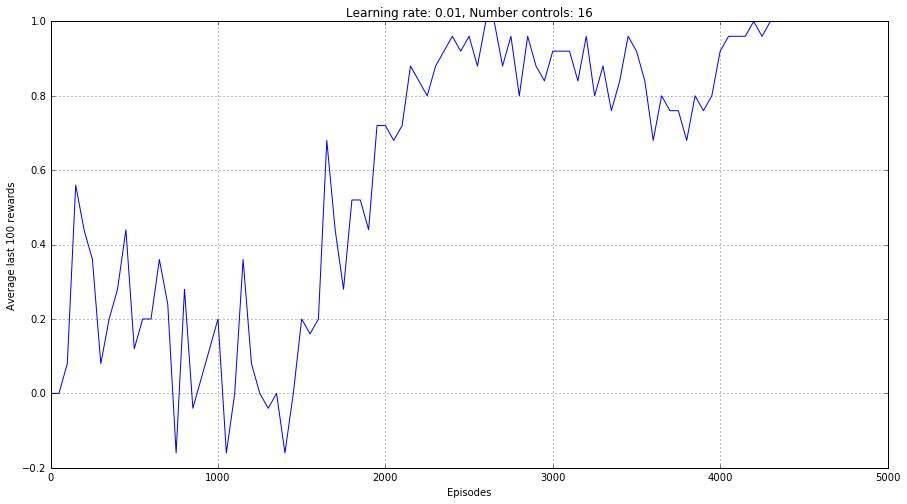

In [65]:
import matplotlib.pyplot as plt

e = [i for i in range(0,5001,50)]
m_rew = [0]+[np.mean(rewards[e[i]-50:e[i]]) for i in range(1,len(e))]
plt.figure(figsize=(15,8))
plt.plot(e, m_rew)

plt.xlabel('Episodes')
plt.ylabel('Average last 100 rewards')
plt.title('Learning rate: 0.01, Number controls: 16')
plt.grid(True)
plt.show()

Our agent successfully learned how to mimic the environment in less than 3000 episodes and asymptotically achieved perfect learning at about 4500 episodes.

In [59]:
rewards_2 = invasion_game(0.01, 10000, 16, True)

[ 0.00158856 -0.00102901  0.00158856 -0.00102901  0.00158856 -0.00102901
  0.00158856 -0.00102901  0.00158856 -0.00102901  0.00158856 -0.00102901
  0.00158856 -0.00102901  0.00158856 -0.00102901]
0 -1.0
[ 0.26945172 -0.19354404  0.2023013  -0.23305741  0.13555969 -0.24326832
  0.0717667  -0.2228556   0.01165248 -0.18070847 -0.04463423 -0.13216135
 -0.09752424 -0.09187899 -0.14527327 -0.06963195]
100 0.1
[ 0.6477016  -0.04802401  0.39512887 -0.25805282  0.21953894 -0.36964144
  0.09951098 -0.38047308  0.00746392 -0.29953328 -0.08571611 -0.17960959
 -0.20871532 -0.09100999 -0.35923012 -0.09872742]
200 0.52
[ 0.75405207  0.02201752  0.35406241 -0.27789916  0.16028468 -0.41150603
  0.06330564 -0.40944652  0.01788867 -0.29674956 -0.04387605 -0.14069368
 -0.18949547 -0.02785898 -0.46795543 -0.09053575]
300 0.88
[ 0.82295674  0.05379887  0.30421463 -0.30041734  0.11751703 -0.44112605
  0.06294824 -0.42605737  0.05808066 -0.29682452  0.0129932  -0.12410772
 -0.14898564  0.00836543 -0.58917329 

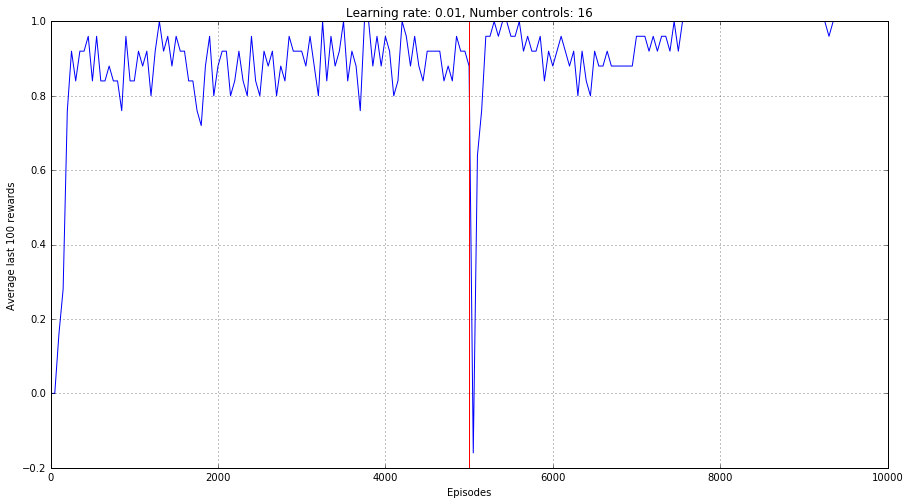

In [64]:
e = [i for i in range(0,10001,50)]
m_rew = [0]+[np.mean(rewards_2[e[i]-50:e[i]]) for i in range(1,len(e))]
plt.figure(figsize=(15,8))
plt.plot(e, m_rew)
plt.axvline(x=5000, c='r')

plt.xlabel('Episodes')
plt.ylabel('Average last 100 rewards')
plt.title('Learning rate: 0.01, Number controls: 16')
plt.grid(True)
plt.show()

This agent here is initially luckier than the previous one, but moreover when we reversed the meaning of the symbols the environment sent him, it took him less than 200 episodes to output the correct actions again which indicates good adaptivity to environment changes.  